<a href="https://colab.research.google.com/github/suheylakarakaya/global_ai_hub_works/blob/main/IMDB_Score_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import csv
import sys
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixOriginals.csv to NetflixOriginals.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['NetflixOriginals.csv']), encoding = "ISO-8859-1")

In [ ]:
df.head(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
##Tek bir hücredeki spesifik bir veriye ulaşmak için kullanılır.
display(df.iloc[4][2])

'October 30, 2020'

In [ ]:
df.sort_values(by= ['Runtime', 'Language'], ascending=[False, False])

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
247,Citation,Drama,"November 6, 2020",151,6.2,English
...,...,...,...,...,...,...
498,Zion,Documentary,"August 10, 2018",11,7.2,English
66,American Factory: A Conversation with the Obamas,Aftershow / Interview,"August 21, 2019",10,5.2,English
325,Canvas,Animation / Short,"December 11, 2020",9,6.5,English
417,Cops and Robbers,Animation / Short,"December 28, 2020",7,6.9,English


### **KEŞİFSEL VERİ ANALİZİ /// GLOBAL AI HUB**

1) Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [ ]:
l_r = df[['Language', 'Runtime']]
l_r.sort_values(by= ['Runtime'], ascending=[False]).head(10)

,Language,Runtime
561,English,209
328,English,155
581,English,153
247,English,151
284,Japanese,151
509,Hindi,149
7,English,149
543,Hindi,149
194,English,148
5,Hindi,147


2) 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [ ]:
df["Date"] = pd.to_datetime(df.Premiere)

a = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")]

aFig = px.bar(a, x=a.Title, y = a["IMDB Score"])
aFig.show()

3) İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?


In [ ]:
b=  df.loc[(df["Language"] == "English")] 
b.sort_values(by= ['IMDB Score'], ascending=[False]).head(1)


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04


4) 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [ ]:
df.loc[(df["Language"] == "Hindi")].agg({"Runtime": "mean"})

Runtime    115.787879
dtype: float64

5) 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [ ]:
df.Genre.nunique()

115

In [ ]:
df.Genre.unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [ ]:
genre = df.Genre.value_counts().nlargest(10) 
genre

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: Genre, dtype: int64

In [ ]:
fig = px.bar(data_frame=genre, x=genre.index, y=genre.values, labels={"y":"Genre Movies", "index":"Genres"})

fig.show()

6) Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.


In [ ]:
df.value_counts("Language").head(3)

Language
English    401
Hindi       33
Spanish     31
dtype: int64

7) IMDB puanı en yüksek olan ilk 10 film hangileridir?


In [ ]:
Top10 =df[['Title', 'IMDB Score']]
Top10.sort_values(by= ['IMDB Score'], ascending=[False]).head(10)

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


8) IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

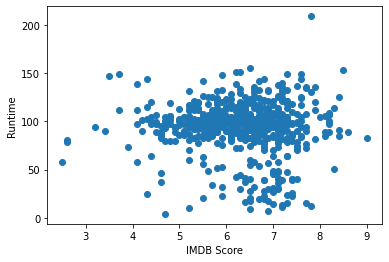

In [ ]:
plt.scatter(df["IMDB Score"] , df["Runtime"])
plt.xlabel("IMDB Score")
plt.ylabel("Runtime")
plt.show()

In [ ]:
#Veri kümesinde yer alan tüm öznitelikler arasındaki korelasyon katsayısı değerlerini içeren matrisi hesaplamak için aşağıdaki kod parçası kullanılabilir.
#Runtime ile IMDB Score arasında negatif yönlü zayıf bir ilişki vardır.
df.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


9) IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.


In [ ]:
a = df.sort_values(by= ['IMDB Score'], ascending=[False]).head(10)
a[['Genre', 'IMDB Score']]

,Genre,IMDB Score
583,Documentary,9.0
582,Documentary,8.6
581,One-man show,8.5
580,Documentary,8.4
579,Concert Film,8.4
578,Concert Film,8.4
577,Documentary,8.3
576,Documentary,8.3
573,Animation/Christmas/Comedy/Adventure,8.2
571,Documentary,8.2


In [ ]:
fig = px.scatter(a, y= 'Genre', x='IMDB Score', color='Genre', title = "Top 10 High IMDB Score Genre")
fig.show()

10) 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [ ]:
top10runtime = df.sort_values(by= ['Runtime'], ascending=[False]).head(10)
top10runtime[['Title', 'Runtime']]

,Title,Runtime
561,The Irishman,209
328,Da 5 Bloods,155
581,Springsteen on Broadway,153
247,Citation,151
284,The Forest of Love,151
509,Raat Akeli Hai,149
7,The Last Days of American Crime,149
543,Ludo,149
194,Army of the Dead,148
5,Drive,147


In [ ]:
top10runtimeFig = px.bar(top10runtime, x=top10runtime.Title, y = top10runtime["Runtime"])

top10runtimeFig.show()

11) Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [ ]:
df['Year'] = df['Date'].dt.year
year = df.Year.value_counts()

year

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

In [ ]:
fig = px.bar(data_frame=df, x=year.index, y=year.values, labels={"y":"Yıl başına düşen film sayısı", "x":"Yıl"})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

12) Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [ ]:
x = df[['Language', 'IMDB Score']]
x.sort_values(by= ['IMDB Score'], ascending=[True]).head(10)

,Language,IMDB Score
0,English/Japanese,2.5
1,Spanish,2.6
2,Italian,2.6
3,English,3.2
4,Hindi,3.4
5,Hindi,3.5
6,Turkish,3.7
7,English,3.7
8,English,3.9
9,Hindi,4.1


In [ ]:
low = df.groupby("Language")["IMDB Score"].mean().nsmallest(15)
low

Language
Malay               4.200000
English/Japanese    4.400000
Filipino            5.100000
Norwegian           5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Turkish             5.660000
French              5.770000
Dutch               5.800000
Indonesian          5.844444
Korean              5.916667
Name: IMDB Score, dtype: float64

In [ ]:
fig = px.bar(low, x=low.index, y=low.values, 
             labels={'y':'Average Rating Score', 'x':'Language'})

fig.show()

13) Hangi yılın toplam "runtime" süresi en fazladır?

In [ ]:
# Runtime süresi en fazla olan yıl 2020'dir.
df[df.Runtime == df.Runtime.max()]["Premiere"]
year = df.Year.value_counts()
RunYear = df.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)
RunYear

,Runtime
Year,
2020,17384
2019,10856
2018,9405
2021,7214
2017,6129
2016,2766
2015,814
2014,81


14) Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [ ]:
df.groupby(["Language"])["Genre"].value_counts()

Language      Genre          
Bengali       Documentary          1
Dutch         Crime drama          1
              Fantasy              1
              Romantic comedy      1
English       Documentary        120
                                ... 
Thai          Horror               1
Thia/English  Documentary          1
Turkish       Comedy               2
              Drama                2
              Romance              1
Name: Genre, Length: 204, dtype: int64

15) Veri setinde outlier veri var mıdır? Açıklayınız.

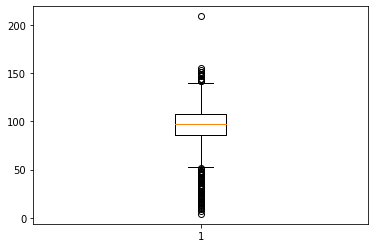

<Figure size 720x504 with 0 Axes>

In [ ]:
#Outlier(Runtime)
#Runtime değeri 150 üzerindekiler ve 50 altındakiler outlier verilerdir.
plt.boxplot(df["Runtime"])
fig = plt.figure(figsize =(10, 7))
plt.show()

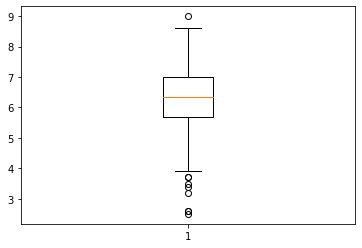

<Figure size 720x504 with 0 Axes>

In [ ]:
#Outlier(IMDB Score)
#Kutu grafiklerinin min ve max değerleri dışındaki veriler outlier verilerdir. Örneğin IMDB Score yaklaşık olarak 4'ün altındaki veriler ve 9'a yakın olan bir veri outlier veridir.
plt.boxplot(df["IMDB Score"])
fig = plt.figure(figsize =(10, 7))
plt.show()

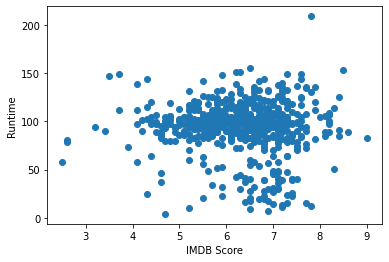

In [ ]:
### Runtime süresi 200'ün üzerinde olan veri ve IMDB puanı 3'ün altında olan verileri outlier veri olarak yorumlayabiliriz. 
plt.scatter(df["IMDB Score"] , df["Runtime"])
plt.xlabel("IMDB Score")
plt.ylabel("Runtime")
plt.show()